   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

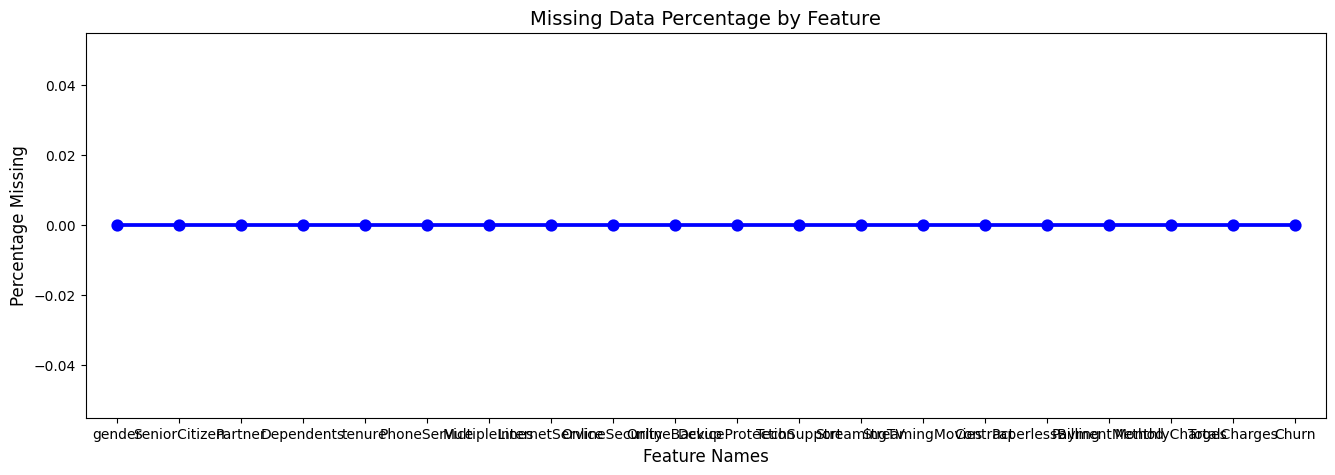

Accuracy: 0.7998580553584103
Confusion Matrix:
 [[946  90]
 [192 181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



<ipython-input-4-5775484fd910>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances.Importance, palette='viridis')


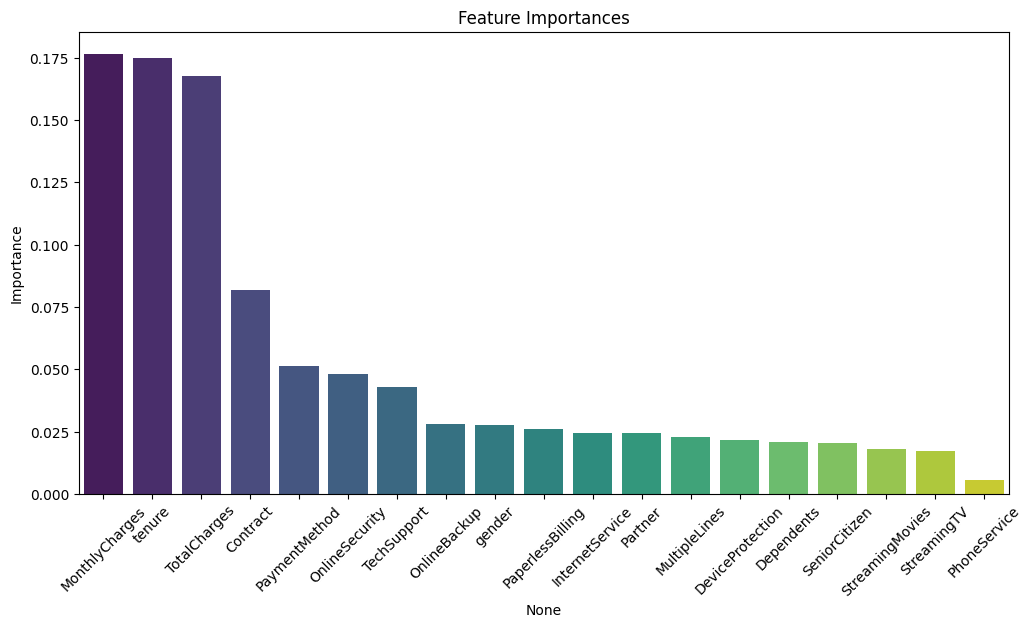

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6815 - loss: 0.5706 - val_accuracy: 0.7949 - val_loss: 0.4144
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7751 - loss: 0.4541 - val_accuracy: 0.8091 - val_loss: 0.4083
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7991 - loss: 0.4235 - val_accuracy: 0.8112 - val_loss: 0.4052
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7940 - loss: 0.4246 - val_accuracy: 0.8098 - val_loss: 0.4039
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8090 - loss: 0.4132 - val_accuracy: 0.8105 - val_loss: 0.4064
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7967 - loss: 0.4277 - val_accuracy: 0.8091 - val_loss: 0.4049
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.4223 - val_accuracy: 0.8027 - val_loss: 0.4073
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8011 - loss: 0.4273 - val_accuracy: 0.8062 - val_

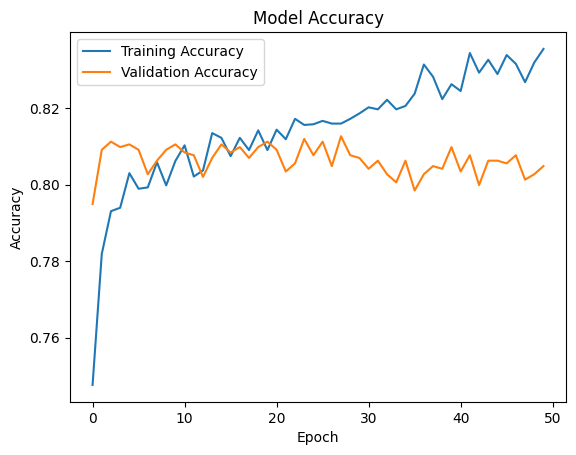

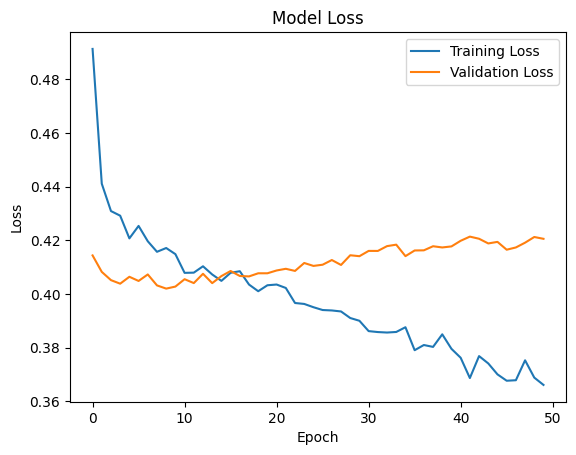

Test Loss: 0.4205773174762726
Test Accuracy: 0.8048261404037476


In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler # Changed StandardScalerw to StandardScaler
from sklearn.ensemble import RandomForestClassifier  # You can experiment with other models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows
print(telco_base_data.head())


telco_data = telco_base_data.drop(columns=["customerID"])

telco_data.info()

import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn library

#Calculate the percentage of missing values
missing_data = (telco_data.isnull().sum() * 100 / telco_data.shape[0]).reset_index()
missing_data.columns = ['Feature', 'Percentage']  # Rename columns for clarity

# Plot the percentage of missing values
plt.figure(figsize=(16, 5))
sns.pointplot(x='Feature', y='Percentage', data=missing_data, color='blue') # Now sns is defined and can be used

plt.xlabel('Feature Names', fontsize=12)
plt.ylabel('Percentage Missing', fontsize=12)
plt.title('Missing Data Percentage by Feature', fontsize=14)
plt.show()

# The following cell handles encoding for categorical data
label_encoder = LabelEncoder()

for column in telco_data.select_dtypes(include=['object']).columns:
    telco_data[column] = label_encoder.fit_transform(telco_data[column])

X = telco_data.drop("Churn", axis=1)
y = telco_data["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example of visualization
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.index, y=feature_importances.Importance, palette='viridis')
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.show()

# Building a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the model
nn_model.save('customer_churn_nn_model.h5')

# Load the saved model (if needed)
from tensorflow.keras.models import load_model
loaded_model = load_model('customer_churn_nn_model.h5')

# Evaluate the model on test data
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
